In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg    # Package Statistique
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr


import warnings
warnings.filterwarnings("ignore") # éviter d'afficher les alertes pythons

c:\users\twins\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
#chargement du jeux de donnée
data = pd.read_feather('cleaned_data_1.feather')

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965242 entries, 0 to 1965241
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   additives_n                float64
 1   completeness               float64
 2   energy_100g                float64
 3   fat_100g                   float64
 4   saturated-fat_100g         float64
 5   carbohydrates_100g         float64
 6   sugars_100g                float64
 7   fiber_100g                 float64
 8   proteins_100g              float64
 9   salt_100g                  float64
 10  brands                     object 
 11  ingredients_text           object 
 12  ingredients_analysis_tags  object 
 13  pnns_groups_1              object 
 14  pnns_groups_2              object 
 15  food_groups                object 
 16  nutrient_levels_tags       object 
 17  main_category_en           object 
 18  categories                 object 
 19  product_name               object 
 20  co

In [5]:
data.describe()

additives_n  completeness   energy_100g      fat_100g  \
count 1965242.00000 1965242.00000 1965242.00000 1965242.00000   
mean        2.29290       0.46812    1038.93214      12.18327   
std         1.84652       0.20188     767.67859      16.11298   
min         0.00000       0.10000       0.00000       0.00000   
25%         1.52047       0.27500     345.00000       0.50000   
50%         2.19778       0.40000     975.00000       5.71000   
75%         2.89392       0.57500    1582.00000      19.00000   
max        40.00000       1.10000    3770.00000     100.00000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count       1965242.00000       1965242.00000 1965242.00000 1965242.00000   
mean              4.60092            26.13126      12.15535       2.53651   
std               7.37649            26.78672      18.32569       3.05302   
min               0.00000             0.00000       0.00000       0.00000   
25%               0.10000             3.57000       0.60000       1.07542   
50%               1.50000            13.60000       3.40000       2.10000   
75%               6.16740            50.00000      15.00000       3.22691   
max             100.00000           100.00000     100.00000     100.00000   

       proteins_100g     salt_100g  nutriscore_score  
count  1965242.00000 1965242.00000      778560.00000  
mean         8.39954       1.34342           9.03332  
std          9.73965       3.97992           8.62570  
min          0.00000       0.00000         -15.00000  
25%          1.30000       0.11000           1.00000  
50%          5.88235       0.77458          10.00000  
75%         12.00000       1.52400          16.00000  
max        100.00000     100.00000          40.00000

# Analyse exploratoire

## Analyse Univariée 

On va réaliser une analyse univariée des différentes variables du jeux de donnée nettoyée. Nous commençons avec l'étude des variables quantitatives.

### Variable Quantitative

In [6]:
quantitative_columns = data.select_dtypes(include = ['float64']).columns

In [7]:
quantitative_columns

Index(['additives_n', 'completeness', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutriscore_score'],
      dtype='object')

In [8]:
data[data['nutriscore_score']== -15].head()

additives_n  completeness  energy_100g  fat_100g  saturated-fat_100g  \
55456       0.00000       0.57500    200.00000  20.00000             0.00000   
119574      0.00000       0.68750    176.00000   1.00000             1.00000   
385764      0.00000       0.88750    296.00000   0.00000             0.00000   
523474      0.69058       0.47500    151.00000   0.00000             0.00000   
557672      0.00000       0.88750      0.00000   0.00000             0.00000   

        carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
55456             30.00000      0.00000     2.16843        0.00000    0.00000   
119574             4.20000      2.50000     8.30000       18.00000    0.00000   
385764             0.00000      0.00000    11.50000        9.40000    0.03300   
523474             2.00000      2.00000     7.00000       18.00000    0.00000   
557672            12.00000      1.20000    14.00000       10.00000    0.00000   

        ... pnns_groups_2    food_groups  \
55456   ...    vegetables  en:vegetables   
119574  ...    vegetables  en:vegetables   
385764  ...    vegetables  en:vegetables   
523474  ...    vegetables  en:vegetables   
557672  ...    vegetables  en:vegetables   

                                     nutrient_levels_tags  \
55456   en:fat-in-moderate-quantity,en:saturated-fat-i...   
119574  en:fat-in-low-quantity,en:saturated-fat-in-low...   
385764  en:fat-in-low-quantity,en:saturated-fat-in-low...   
523474  en:fat-in-low-quantity,en:saturated-fat-in-low...   
557672  en:fat-in-low-quantity,en:saturated-fat-in-low...   

                   main_category_en  \
55456                     mushrooms   
119574  frozen-raw-artichoke-bottom   
385764                    mushrooms   
523474      canned peas and carrots   
557672                       salads   

                                               categories  \
55456   aliments et boissons à base de végétaux, alime...   
119574  aliments et boissons à base de végétaux, alime...   
385764  alimentos y bebidas de origen vegetal, aliment...   
523474  aliments et boissons à base de végétaux, alime...   
557672  aliments et boissons à base de végétaux, alime...   

                                             product_name    countries_en  \
55456                                  champignons coupés  france,morocco   
119574                                   fonds artichauts          france   
385764                            hongo shiitake morimoto          mexico   
523474  petit pois extra fins & jeune carottes à l’étuvée          france   
557672                                   sucrine 3 pièces          france   

       nutriscore_score nutriscore_grade  ecoscore_grade  
55456         -15.00000                a               b  
119574        -15.00000                a               c  
385764        -15.00000                a               a  
523474        -15.00000                a               b  
557672        -15.00000                a  not-applicable  

[5 rows x 24 columns]

Nous représontons la distribution des valeurs des indicateurs-nutri avec un histogram et boite à moustache

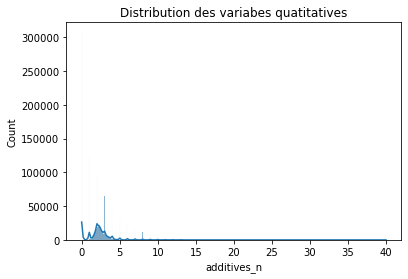

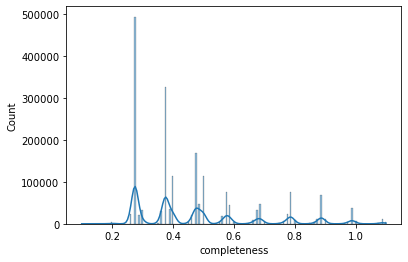

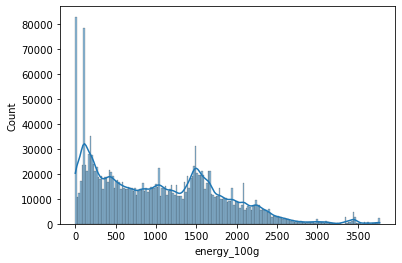

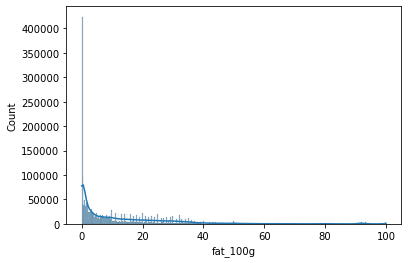

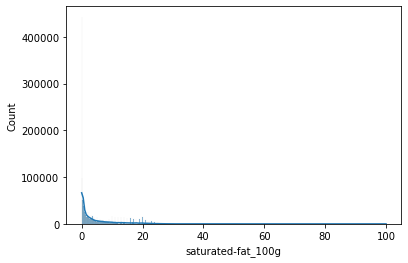

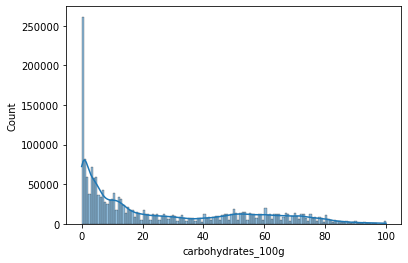

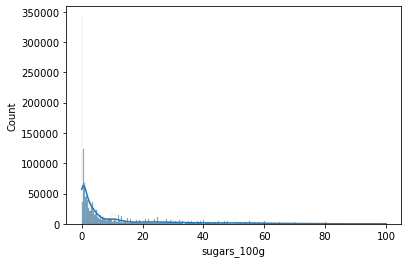

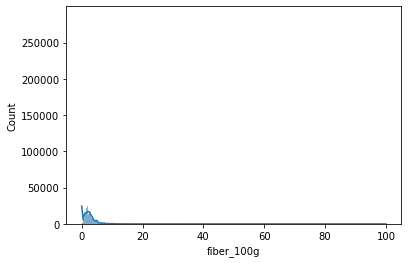

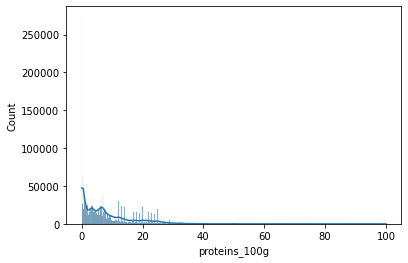

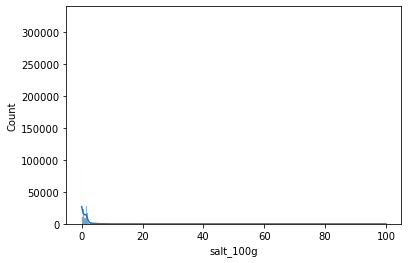

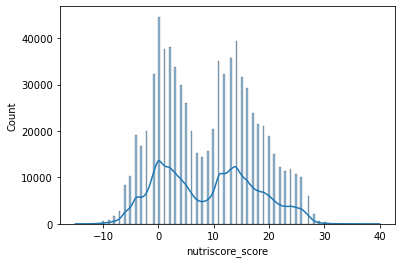

In [9]:
plt.title("Distribution des variabes quatitatives")
for col in quantitative_columns:
    
    sns.histplot(x=col, data=data, kde=True);
    plt.show()

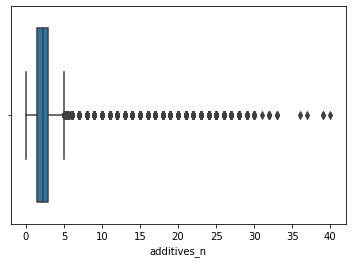

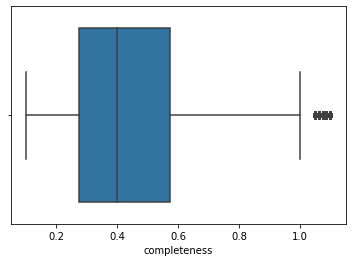

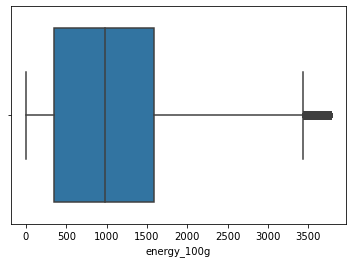

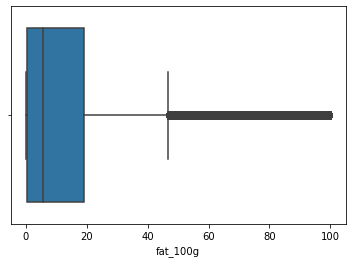

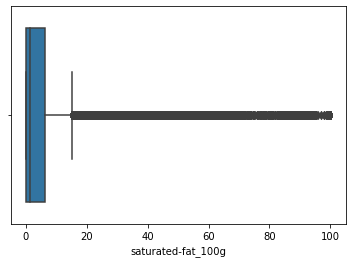

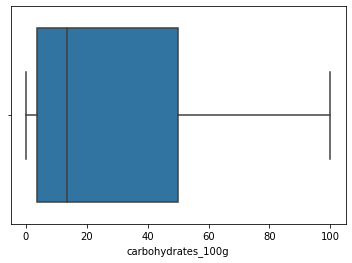

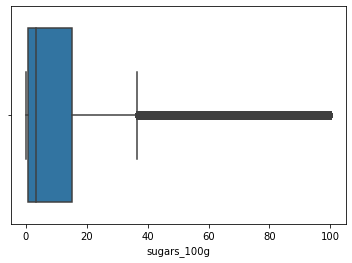

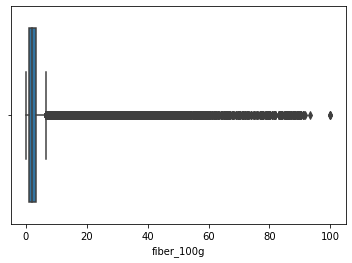

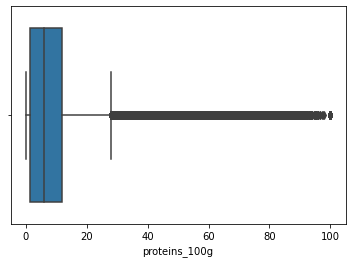

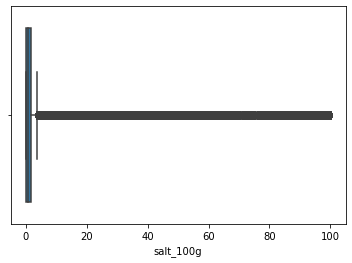

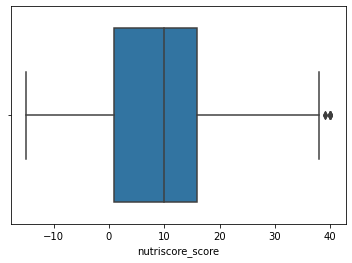

In [10]:
for col in quantitative_columns:
    sns.boxplot(x=col, data=data);
    plt.show()

### Variable qualitatives

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965242 entries, 0 to 1965241
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   additives_n                float64
 1   completeness               float64
 2   energy_100g                float64
 3   fat_100g                   float64
 4   saturated-fat_100g         float64
 5   carbohydrates_100g         float64
 6   sugars_100g                float64
 7   fiber_100g                 float64
 8   proteins_100g              float64
 9   salt_100g                  float64
 10  brands                     object 
 11  ingredients_text           object 
 12  ingredients_analysis_tags  object 
 13  pnns_groups_1              object 
 14  pnns_groups_2              object 
 15  food_groups                object 
 16  nutrient_levels_tags       object 
 17  main_category_en           object 
 18  categories                 object 
 19  product_name               object 
 20  co

Nous représentons un countplot  de la répartition des produits par pnns. 

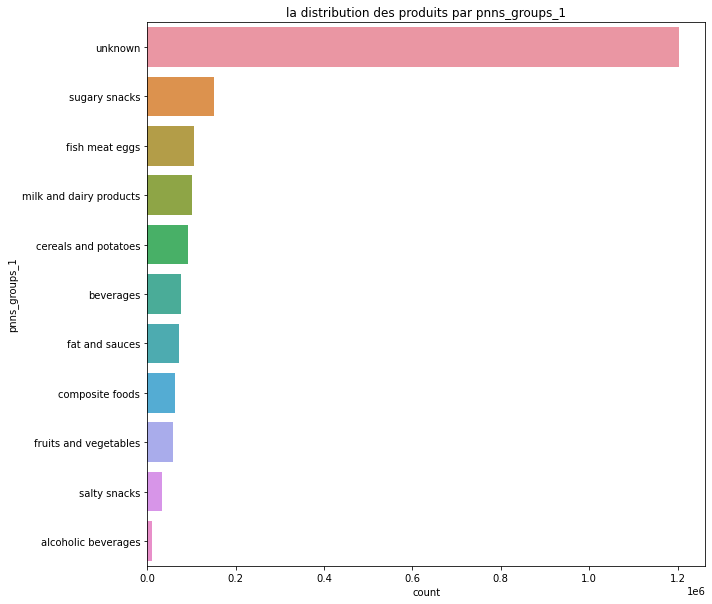

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y="pnns_groups_1", data=data, order=pd.value_counts(data['pnns_groups_1']).index)
plt.ylabel("pnns_groups_1")
plt.title("la distribution des produits par pnns_groups_1")
plt.show()

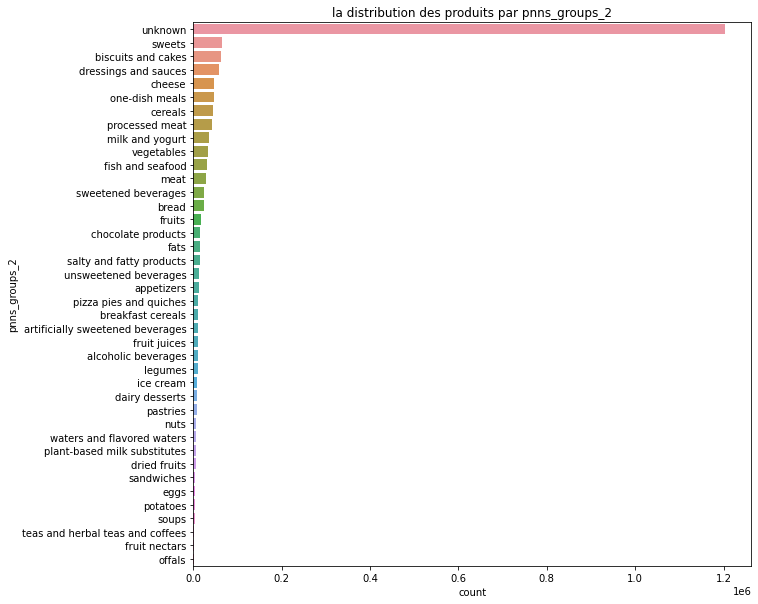

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y="pnns_groups_2", data=data, order=pd.value_counts(data['pnns_groups_2']).index)
plt.ylabel("pnns_groups_2")
plt.title("la distribution des produits par pnns_groups_2")
plt.show()

Nous nous intéressons à la distribution des pays représentés dans notre jeux de données

In [14]:
data['countries_en'].value_counts().shape[0]

5177

Pour une meilleur visualisation, nous choisissons de sélectionner les 10 pays les plus représentés dans notre jeux de donnée.

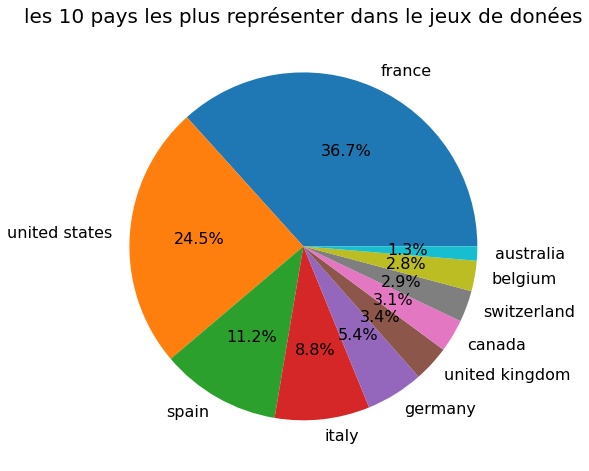

In [15]:
plt.figure(figsize=(8,8))

plt.title('les 10 pays les plus représenter dans le jeux de donées', size=20)
wedges, texts, autotexts = plt.pie(data.countries_en.value_counts().iloc[:10].values, 
        labels = data.countries_en.value_counts().iloc[:10].index,
       autopct='%1.1f%%', textprops={'fontsize': 16}
       )


la France est le pays le plus présent dans notre jeux de données avec un pourcentage de 36.7%

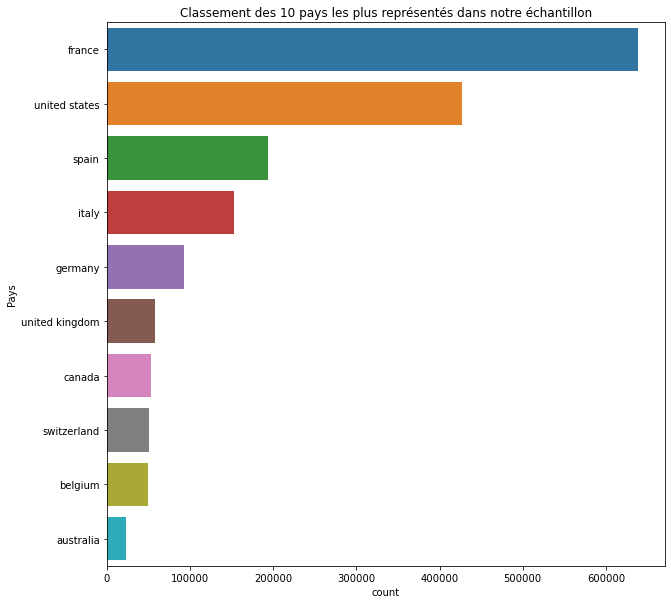

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y="countries_en", data=data, order=pd.value_counts(data['countries_en']).iloc[:10].index)
plt.ylabel("Pays")
plt.title("Classement des 10 pays les plus représentés dans notre échantillon")
plt.show()

Nous observons que la France est le pays le plus représenter dans notre jeu de données. Pour le reste de ce travaille, nous utiliserons les produits français comme échantillons. 

In [17]:
data_France = data.loc[data['countries_en'] == 'france']

In [18]:
print('le nombre de produits d\'origine de france =', data_France.shape[0])

le nombre de produits d'origine de france = 638631


In [19]:
print('Nombre de marques produites uniquement en France =', len(data_France['brands'].unique()))

Nombre de marques produites uniquement en France = 51092


Nous classons les marques les plus représenter en France

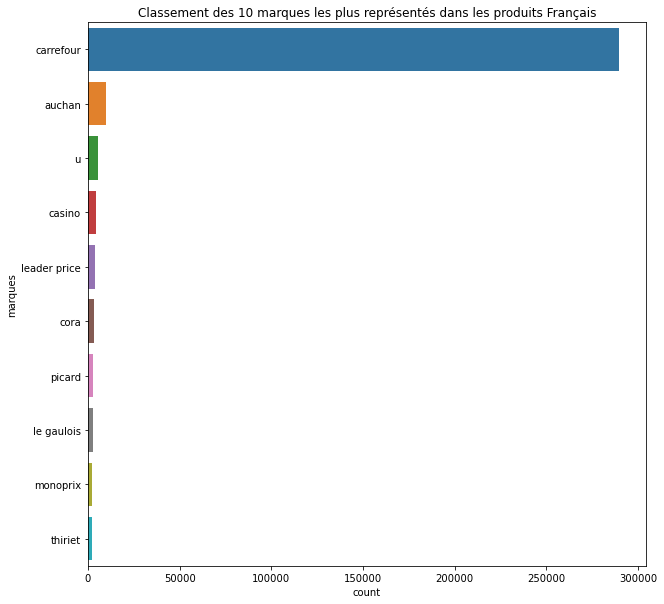

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(y="brands", data=data_France, order=pd.value_counts(data_France['brands']).iloc[:10].index)
plt.ylabel("marques")
plt.title("Classement des 10 marques les plus représentés dans les produits Français")
plt.show()

Carrefour est la marque Française la plus représenter dans notre jeux de données

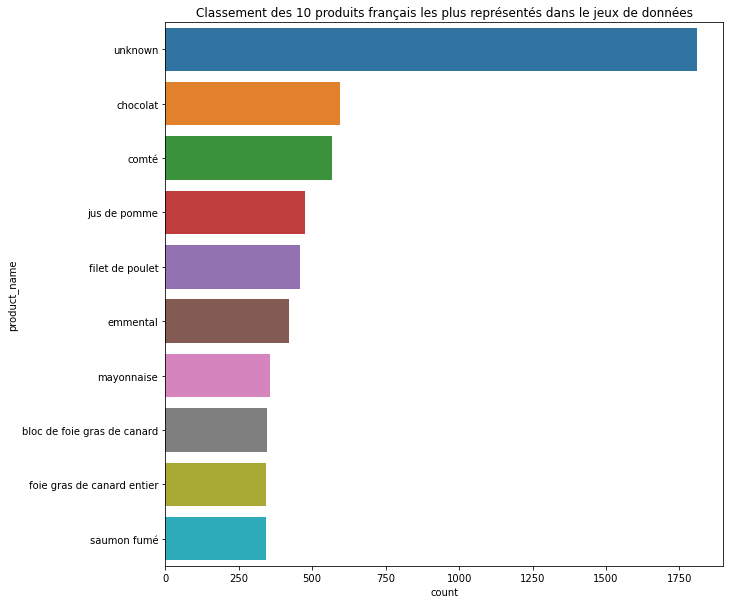

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(y="product_name", data=data_France, order=pd.value_counts(data_France['product_name']).iloc[:10].index)
plt.ylabel("product_name")
plt.title("Classement des 10 produits français les plus représentés dans le jeux de données")
plt.show()

Nous représentons la distribution des produits par nutri-grade dans le mondre et dans la France

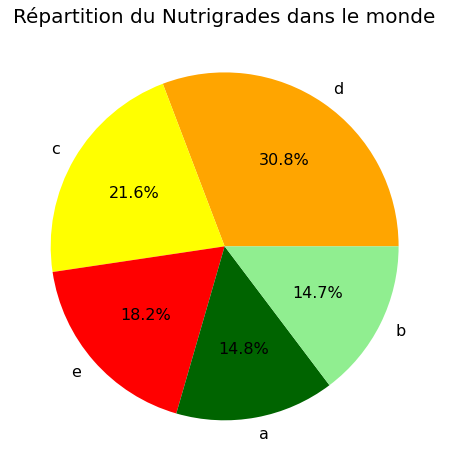

In [22]:
plt.figure(figsize=(8,8))
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
labels_ = data.nutriscore_grade.value_counts().index.tolist()
plt.title('Répartition du Nutrigrades dans le monde', size=20)
wedges, texts, autotexts = plt.pie(data.nutriscore_grade.value_counts().values, 
        labels = data.nutriscore_grade.value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize': 16} ,colors = [palette[key] for key in labels_]
       )


In [23]:
data.nutriscore_grade.value_counts().index.tolist()

['d', 'c', 'e', 'a', 'b']

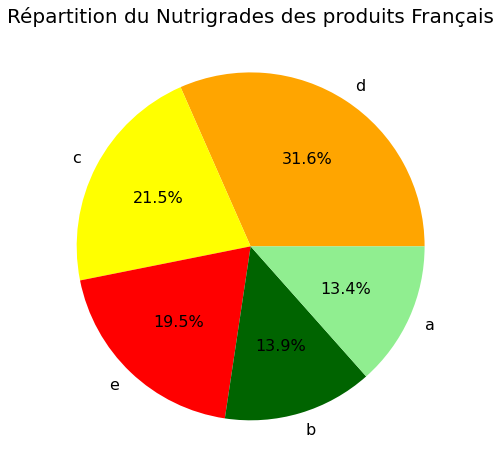

In [24]:
plt.figure(figsize=(8,8))
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen', 
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
labels_ = data.nutriscore_grade.value_counts().index.tolist()
plt.title('Répartition du Nutrigrades des produits Français', size=20)
wedges, texts, autotexts = plt.pie(data_France.nutriscore_grade.value_counts().values, 
        labels = data_France.nutriscore_grade.value_counts().index,
       autopct='%1.1f%%', textprops={'fontsize': 16},colors = [palette[key] for key in labels_]
       )

### synthèse

Les variables semble ne pas suivre une distribution normale. Par la suite, on veut tester l'équalité des variances entre les indicateurs nutritionnelle et le nutrigrade.

## Analyse Bi-variée

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965242 entries, 0 to 1965241
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   additives_n                float64
 1   completeness               float64
 2   energy_100g                float64
 3   fat_100g                   float64
 4   saturated-fat_100g         float64
 5   carbohydrates_100g         float64
 6   sugars_100g                float64
 7   fiber_100g                 float64
 8   proteins_100g              float64
 9   salt_100g                  float64
 10  brands                     object 
 11  ingredients_text           object 
 12  ingredients_analysis_tags  object 
 13  pnns_groups_1              object 
 14  pnns_groups_2              object 
 15  food_groups                object 
 16  nutrient_levels_tags       object 
 17  main_category_en           object 
 18  categories                 object 
 19  product_name               object 
 20  co

###  Variables Quantitatives 

la correlation linéaire  entre les variables quantitatives

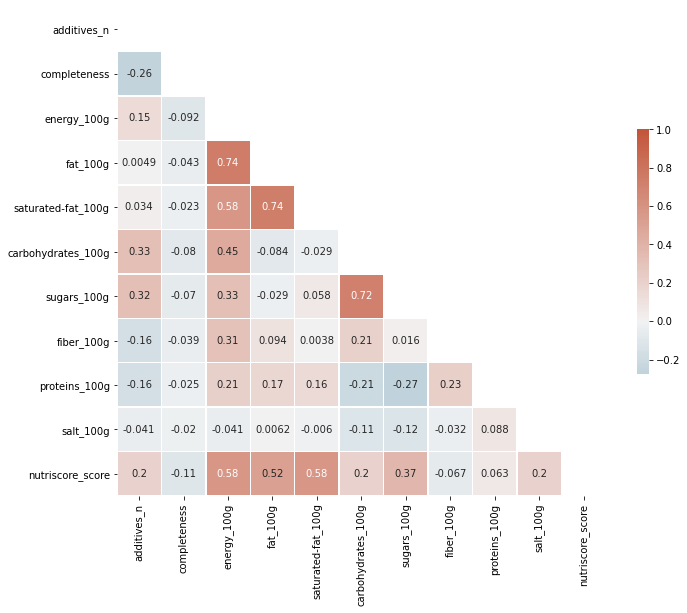

In [26]:
corr = data_France[quantitative_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);

- On observe une forte correlation entre (sugers_100g, carbohidrates_100g) et (fat_100g, satured-fat_100g)
- Une correlation entre l'energy et (satured-fat_100g, nutriscore_score, )
- Une petite correlation entre nutriscore et [satured-fat , fats, sugars_100g]

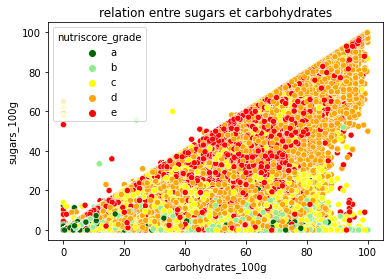

In [27]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']

sns.scatterplot(data=data_France, y= 'sugars_100g', x='carbohydrates_100g',hue="nutriscore_grade",hue_order=hue_order,palette=palette).set_title("relation entre sugars et carbohydrates");

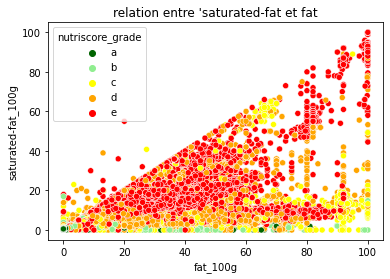

In [28]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']
sns.scatterplot(data=data_France, y= 'saturated-fat_100g', x='fat_100g',hue="nutriscore_grade",hue_order=hue_order,palette=palette).set_title("relation entre 'saturated-fat et fat");

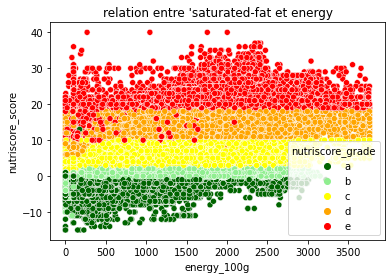

In [29]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']
sns.scatterplot(data=data_France, y= 'nutriscore_score', x='energy_100g',hue="nutriscore_grade",hue_order=hue_order,palette=palette).set_title("relation entre 'saturated-fat et energy");

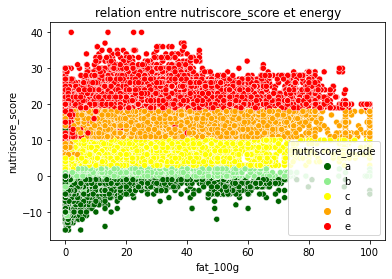

In [30]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']

sns.scatterplot(data=data_France, y= 'nutriscore_score', x='fat_100g',hue="nutriscore_grade",hue_order=hue_order,palette=palette).set_title("relation entre nutriscore_score et energy");

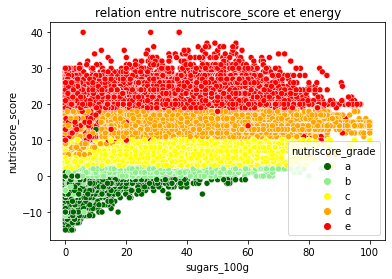

In [31]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']
sns.scatterplot(data=data_France, y= 'nutriscore_score', x='sugars_100g',hue="nutriscore_grade",hue_order=hue_order,palette=palette).set_title("relation entre nutriscore_score et energy");

Le lien entre le nombre d'addditive et la quantité du sucre dans les produits

### Variables Quantitatives et qualitatives

visualiser la distribution des _100g en fonction du nutrigrade


In [32]:
__100g = ['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g',
          'sugars_100g','fiber_100g','proteins_100g','salt_100g']          

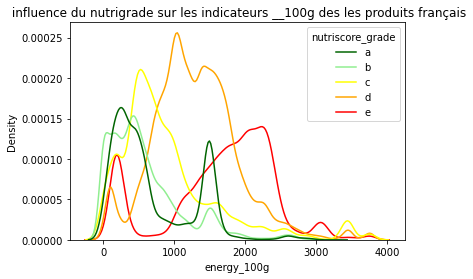

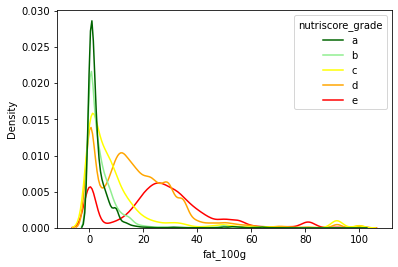

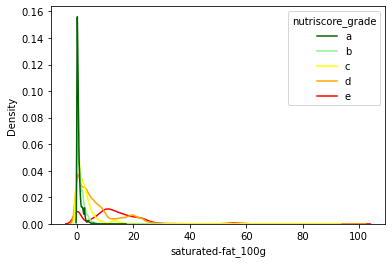

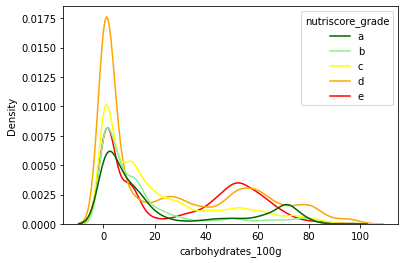

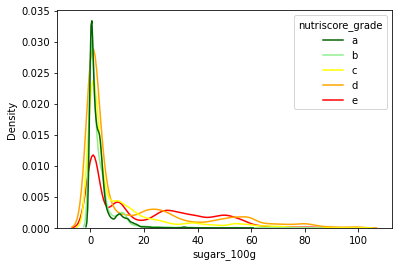

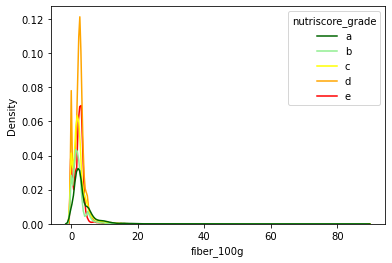

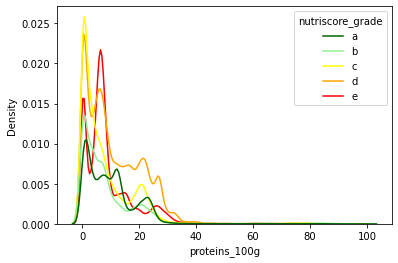

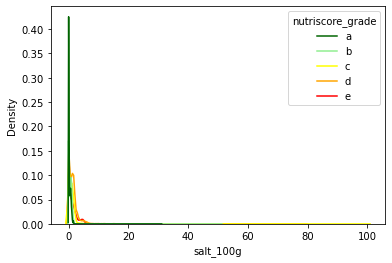

In [33]:
plt.title(" influence du nutrigrade sur les indicateurs __100g des les produits français")
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']
for var in __100g:
    sns.kdeplot(data=data_France, x=var, hue="nutriscore_grade",hue_order=hue_order,palette=palette);

    plt.xlabel(str(var))
    plt.show()

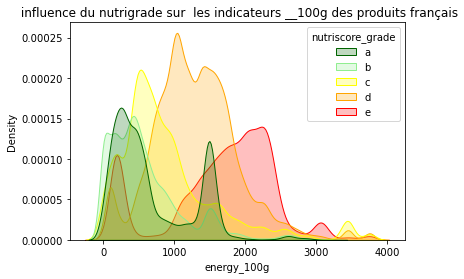

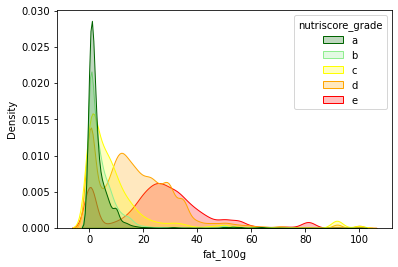

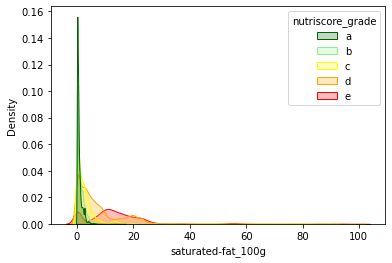

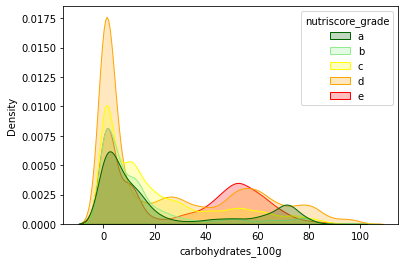

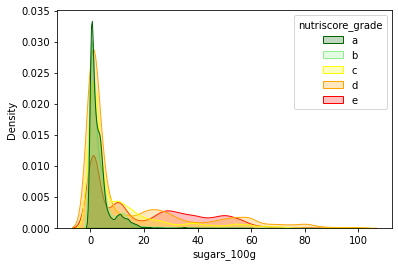

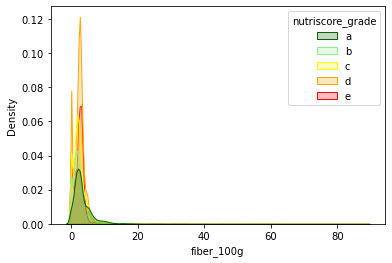

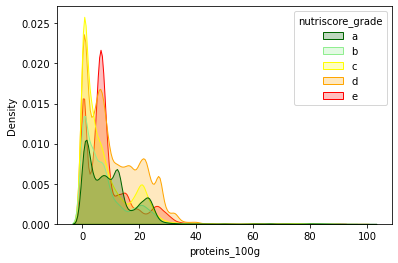

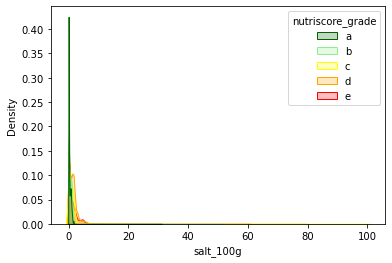

In [34]:
plt.title(" influence du nutrigrade sur  les indicateurs __100g des produits français")
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
hue_order = ['a', 'b', 'c','d','e']
for var in __100g:
    sns.kdeplot(data=data_France, x=var, hue="nutriscore_grade",fill=True,hue_order=hue_order,palette=palette);

    plt.xlabel(str(var))
    plt.show()

 Nous visualisons l'influence du nutrigrade sur le sucre / fat / energy


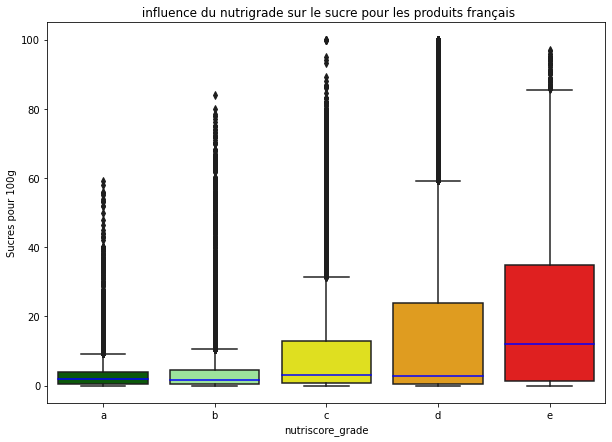

In [35]:
plt.figure(figsize=(10, 7))
medianprops = {'color':"blue"}
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
order_grade= data_France.groupby(by=["nutriscore_grade"])["sugars_100g"].median().index
sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=data_France, medianprops=medianprops, order=order_grade,palette=palette)
plt.title(" influence du nutrigrade sur le sucre pour les produits français")
plt.xlabel("nutriscore_grade")
plt.ylabel("Sucres pour 100g")
plt.show()

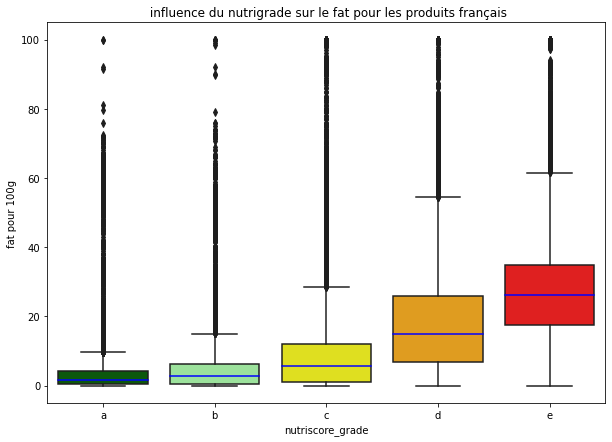

In [36]:
plt.figure(figsize=(10, 7))
medianprops = {'color':"blue"}
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
order_grade= data_France.groupby(by=["nutriscore_grade"])["fat_100g"].median().index
sns.boxplot(x="nutriscore_grade", y="fat_100g", data=data_France, order=order_grade,palette=palette, medianprops=medianprops)
plt.title(" influence du nutrigrade sur le fat pour les produits français")
plt.xlabel("nutriscore_grade")
plt.ylabel("fat pour 100g")
plt.show()

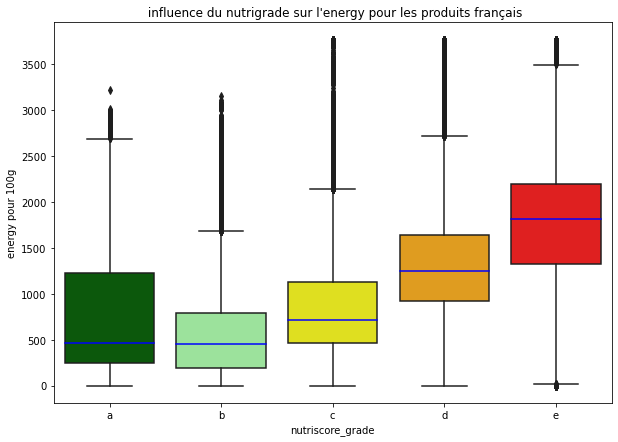

In [37]:
plt.figure(figsize=(10, 7))
medianprops = {'color':"blue"}
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
# on ordonne des nutrigrade par medianne 
order_grade= data_France.groupby(by=["nutriscore_grade"])["energy_100g"].median().index
sns.boxplot(x="nutriscore_grade", y="energy_100g", data=data_France, order=order_grade,palette=palette, medianprops=medianprops)
plt.title(" influence du nutrigrade sur l\'energy pour les produits français")
plt.xlabel("nutriscore_grade")
plt.ylabel("energy pour 100g")
plt.show()

In [38]:
data_France.groupby("nutriscore_grade").describe()

additives_n                                                  \
                       count    mean     std     min     25%     50%     75%   
nutriscore_grade                                                               
a                37367.00000 1.11749 1.33672 0.00000 0.00000 1.00000 1.95635   
b                38732.00000 1.56417 1.62114 0.00000 0.00000 1.64961 2.09044   
c                59897.00000 1.88798 1.74065 0.00000 1.00000 1.91699 2.38464   
d                87863.00000 2.14002 2.03338 0.00000 1.00000 1.88622 2.85639   
e                54191.00000 2.20489 1.74272 0.00000 1.00000 2.00000 3.00000   

                          completeness          ... salt_100g            \
                      max        count    mean  ...       75%       max   
nutriscore_grade                                ...                       
a                30.00000  37367.00000 0.70643  ...   0.53800  31.00000   
b                19.00000  38732.00000 0.68159  ...   0.90000  51.00000   
c                22.00000  59897.00000 0.66118  ...   1.30000 100.00000   
d                32.00000  87863.00000 0.63973  ...   1.80000  79.08000   
e                24.00000  54191.00000 0.63492  ...   1.80000  60.00000   

                 nutriscore_score                                      \
                            count     mean     std       min      25%   
nutriscore_grade                                                        
a                     37367.00000 -3.02216 2.02336 -15.00000 -4.00000   
b                     38732.00000  0.86458 1.02463 -11.00000  0.00000   
c                     59897.00000  5.48290 2.32641   2.00000  4.00000   
d                     87863.00000 13.85435 2.53956   6.00000 12.00000   
e                     54191.00000 21.17927 3.97495  10.00000 19.00000   

                                             
                      50%      75%      max  
nutriscore_grade                             
a                -3.00000 -1.00000 14.00000  
b                 1.00000  2.00000  2.00000  
c                 5.00000  7.00000 10.00000  
d                14.00000 16.00000 18.00000  
e                21.00000 24.00000 40.00000  

[5 rows x 88 columns]

#### Tests statistiques (kruskal wallis)

On test l'hypothèse suivantes: 

H0 : il y a une égalité dans la médianne  des groupes de la variable dépendante.

H1 : il y a au moins une médiane qui diffère.


In [39]:
variables = ["sugars_100g","fat_100g","energy_100g"]

for var in variables: 
    f_stat,pvalue= stats.levene(data_France[data_France.nutriscore_grade=='a'][var],
            data_France[data_France.nutriscore_grade=='b'][var],
            data_France[data_France.nutriscore_grade=='c'][var],
            data_France[data_France.nutriscore_grade=='d'][var],
            data_France[data_France.nutriscore_grade=='e'][var])
    print("(F_stat,Pvalue) de test entre'nutriscore_grade' et",var,"= (",f_stat,',',pvalue,')')

(F_stat,Pvalue) de test entre'nutriscore_grade' et sugars_100g = ( 8647.8226887811 , 0.0 )
(F_stat,Pvalue) de test entre'nutriscore_grade' et fat_100g = ( 6435.454628053239 , 0.0 )
(F_stat,Pvalue) de test entre'nutriscore_grade' et energy_100g = ( 1287.1468247956268 , 0.0 )


On remarque que le p-value est <0.05 donc on peut rejeter H0 et on peut dire que les variable ne sont pas homogènes, par conséquence on ne peut pas appliquer le test paramertic ANOVA.

On applique le test de kruskal wallis qui représente  une ANOVA non paramétric pour des données non-normale. 

In [40]:
variables = ["sugars_100g","fat_100g","energy_100g"]

for var in variables: 
    f_stat,pvalue= stats.kruskal(data_France[data_France.nutriscore_grade=='a'][var],
                                 data_France[data_France.nutriscore_grade=='b'][var],
                                 data_France[data_France.nutriscore_grade=='c'][var],
                                 data_France[data_France.nutriscore_grade=='d'][var],
                                 data_France[data_France.nutriscore_grade=='e'][var])
    print("(F_stat,Pvalue) de test entre'nutriscore_grade' et",var,"= (",f_stat,',',pvalue,')')

(F_stat,Pvalue) de test entre'nutriscore_grade' et sugars_100g = ( 21594.11159497123 , 0.0 )
(F_stat,Pvalue) de test entre'nutriscore_grade' et fat_100g = ( 74035.89702127986 , 0.0 )
(F_stat,Pvalue) de test entre'nutriscore_grade' et energy_100g = ( 77198.03256737725 , 0.0 )


> P-value < 0.05, donc on rejette H0 et on admet H1. Il n'y a pas d'égalité de moyenne entre les 5 groupes de nutri-grade. On peut conclure que: La valeur de l'énergie/fat/sucre influence sur la valeur de nutri-grade.

Countplot des répartition des produits par pnns_groups_1 + nutrigrade

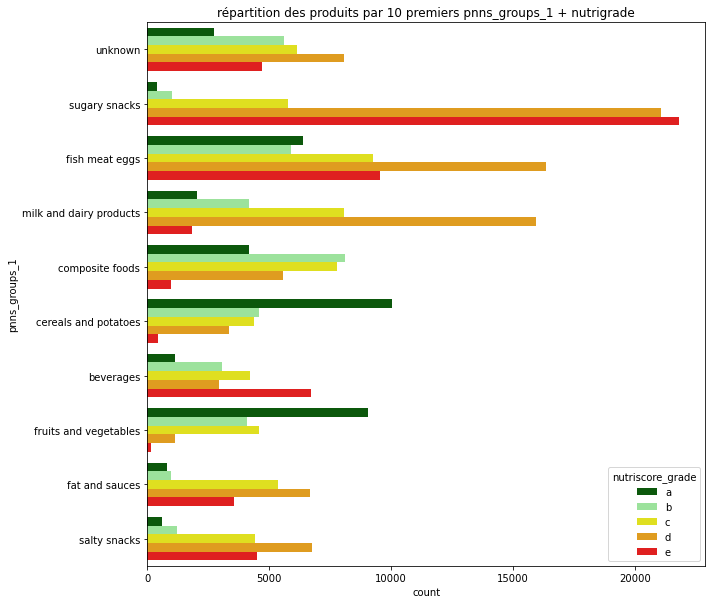

In [41]:
plt.figure(figsize=(10,10))
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}

order_categ = pd.value_counts(data_France['pnns_groups_1']).iloc[:10].index
hue_order = ['a', 'b', 'c','d','e']

sns.countplot(y="pnns_groups_1",hue="nutriscore_grade", data=data_France,palette=palette,order=order_categ,hue_order=hue_order)
plt.ylabel("pnns_groups_1")
plt.title("répartition des produits par 10 premiers pnns_groups_1 + nutrigrade")
plt.show()

### Variables qualitatives

In [42]:
# tableau de contingence entre 'nutriscore_grade' et 'pnns_groups_1'
pd.crosstab(data_France.pnns_groups_1,data_France.nutriscore_grade)

nutriscore_grade             a     b     c      d      e
pnns_groups_1                                           
alcoholic beverages          1     3    16      7      3
beverages                 1115  3047  4194   2945   6697
cereals and potatoes     10041  4580  4373   3340    448
composite foods           4165  8122  7774   5571    969
fat and sauces             792   987  5342   6674   3554
fish meat eggs            6395  5909  9251  16333   9546
fruits and vegetables     9062  4066  4567   1144    138
milk and dairy products   2043  4160  8050  15948   1817
salty snacks               618  1207  4421   6768   4514
sugary snacks              392  1028  5777  21052  21790
unknown                   2743  5623  6132   8081   4715

In [43]:
# normalité sur les lignes
pd.crosstab(data_France.pnns_groups_1,data_France.nutriscore_grade).apply(lambda x: x/x.sum(), axis=1)

nutriscore_grade              a       b       c       d       e
pnns_groups_1                                                  
alcoholic beverages     0.03333 0.10000 0.53333 0.23333 0.10000
beverages               0.06195 0.16930 0.23303 0.16363 0.37210
cereals and potatoes    0.44074 0.20104 0.19195 0.14661 0.01966
composite foods         0.15657 0.30533 0.29224 0.20943 0.03643
fat and sauces          0.04565 0.05689 0.30791 0.38469 0.20485
fish meat eggs          0.13482 0.12457 0.19503 0.34433 0.20125
fruits and vegetables   0.47753 0.21426 0.24066 0.06028 0.00727
milk and dairy products 0.06381 0.12993 0.25142 0.49809 0.05675
salty snacks            0.03526 0.06886 0.25223 0.38613 0.25753
sugary snacks           0.00783 0.02054 0.11545 0.42071 0.43546
unknown                 0.10050 0.20602 0.22466 0.29607 0.17275

In [44]:
# normalité sur les colonnes
pd.crosstab(data_France.pnns_groups_1,data_France.nutriscore_grade).apply(lambda x: x/x.sum(), axis=0)

nutriscore_grade              a       b       c       d       e
pnns_groups_1                                                  
alcoholic beverages     0.00003 0.00008 0.00027 0.00008 0.00006
beverages               0.02984 0.07867 0.07002 0.03352 0.12358
cereals and potatoes    0.26871 0.11825 0.07301 0.03801 0.00827
composite foods         0.11146 0.20970 0.12979 0.06341 0.01788
fat and sauces          0.02120 0.02548 0.08919 0.07596 0.06558
fish meat eggs          0.17114 0.15256 0.15445 0.18589 0.17615
fruits and vegetables   0.24251 0.10498 0.07625 0.01302 0.00255
milk and dairy products 0.05467 0.10740 0.13440 0.18151 0.03353
salty snacks            0.01654 0.03116 0.07381 0.07703 0.08330
sugary snacks           0.01049 0.02654 0.09645 0.23960 0.40210
unknown                 0.07341 0.14518 0.10238 0.09197 0.08701

### Synthèse 

Il ny'a pas une valeur de nutriscore_grade qui domine sur tous les produits. 

Des catégories de produits sont majoritairement notés avec le grade 'A' et 'B' comme : les fruits et les légumes, les céréales et pomme de terres.

Des catégories de produits sont majoritairement notés avec le grade 'E','D'et 'C' comme : les snacks sucrés et les snacks salés.

les poissons/viande/oeufs ont une distribution équilibré sur toutes les notés de nutri-grade. 

## ACP (Analyse en Composantes Principales)

  Analyse de la corrélation linéaire entre les variables quantitatives '*_100g'

In [45]:
__100g

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

Nous selectionnons les 5000 1ère lignes du data_France.

In [46]:
data_France_ = data_France.iloc[:5000]

In [47]:
model_acp_ = PCA(n_components=0.9)
data_France__100g= data_France_[__100g]
data_France__100g = StandardScaler().fit_transform(data_France__100g)
data_acp_ = model_acp_.fit_transform(data_France__100g)
pcs = model_acp_.components_

In [48]:
data_acp_.shape

(5000, 5)

In [49]:
model_acp_.n_components_

5

In [50]:
#la quantité des variance expliquée par chaque composante
model_acp_.explained_variance_

array([2.6388223 , 1.9378025 , 1.20534274, 0.92113375, 0.64259308])

In [51]:
# le pourcentage de variance expliquée
model_acp_.explained_variance_ratio_

array([0.32978682, 0.24217687, 0.15063771, 0.11511869, 0.08030807])

In [52]:
# le pourcentage de variance qu'on peut expliquer en utilisant un certain nombre de composantes
model_acp_.explained_variance_ratio_.cumsum()

array([0.32978682, 0.57196369, 0.72260139, 0.83772008, 0.91802815])

In [53]:
model_acp_.components_.shape

(5, 8)

<function matplotlib.pyplot.show(*args, **kw)>

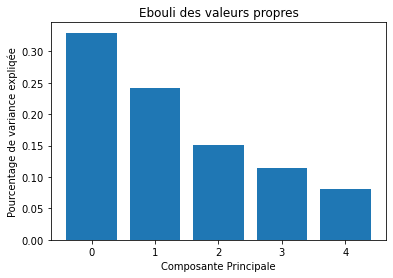

In [54]:
#Visualisation du pourcentage de variance expliquée par chaque composantes
plt.title("Ebouli des valeurs propres")
plt.bar(range(model_acp_.n_components_),model_acp_.explained_variance_ratio_);
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de variance expliqée')
#plt.xticks(range(model_acp_.n_components_))
plt.show

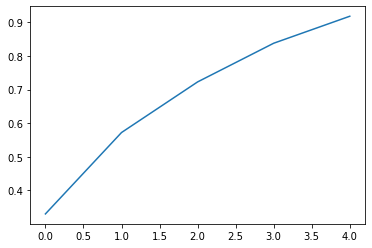

In [55]:
plt.plot(model_acp_.explained_variance_ratio_.cumsum())

In [56]:
import plotly.express as px
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(model_acp_.explained_variance_ratio_ * 100)
}
labels['color'] = 'nutriscore_grade'
n_components= model_acp_.n_components_
total_var = model_acp_.explained_variance_ratio_.sum() * 100

plt = px.scatter_matrix(
    data_acp_,
    labels=labels,
    color = data_France_['nutriscore_grade'][:5000,].values,
    dimensions=range(n_components),
    title=f'Total Explained Variance: {total_var:.2f}%'
    
)
plt.update_traces(diagonal_visible=False)

plt.show()

In [57]:
palette = {
    'a': 'darkgreen',
    'b': 'lightgreen',
    'c': 'yellow',
    'd': 'orange',
    'e': 'red'
}
labels['color'] = 'nutriscore_grade'

labels_= data_France_['nutriscore_grade'].values.tolist()

plt = px.scatter_3d(
    data_acp_, x=0, y=1, z=2, 
    #color=[palette[key] for key in labels_],
    color = labels_,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)







plt.show()

In [58]:
data_recovered = model_acp_.inverse_transform(data_acp_)

In [59]:
data_pca_df= pd.DataFrame(data_acp_, columns = ['PC1','PC2','PC3','PC4','PC5'])
data_pca_df

PC1      PC2      PC3      PC4      PC5
0     0.57342  1.75938 -0.42352  0.20633 -0.40473
1    -1.78998  0.22062 -0.27866 -0.14419  0.65254
2    -0.00474  0.97662  0.29102 -0.03794 -0.48032
3     0.59342 -4.09228 -0.54732  1.73983 -0.65934
4    -0.60469 -0.18722  0.52563  0.09148  0.11528
...       ...      ...      ...      ...      ...
4995 -1.72961  0.26889 -0.61204 -0.32880  0.36513
4996  2.21584 -0.86453  0.16810  0.13338  0.11346
4997  2.12440 -1.43687 -0.57784  0.32867 -0.26169
4998  1.91397 -1.08821  0.33194  0.22709 -0.08881
4999  0.17909  0.42266 -0.31370 -0.00191  0.04025

[5000 rows x 5 columns]

In [60]:
data_pca_df.describe()

PC1        PC2        PC3        PC4        PC5
count 5000.00000 5000.00000 5000.00000 5000.00000 5000.00000
mean    -0.00000   -0.00000    0.00000    0.00000    0.00000
std      1.62445    1.39205    1.09788    0.95976    0.80162
min     -2.13780   -5.32796   -5.72282   -9.24372   -6.84287
25%     -1.38469   -0.71488   -0.64910   -0.31522   -0.34147
50%     -0.27603    0.03192   -0.16359   -0.08066    0.04389
75%      1.10196    0.62533    0.53021    0.30531    0.33042
max      9.08114   13.46120   15.79414   31.97872   19.92861

Affichez le cercle des corrélations des deux premières composantes.

In [61]:
from mlxtend.plotting import plot_pca_correlation_graph

In [62]:
#Matrice des composants et leur coordonnées sur les variables 
pcs = model_acp_.components_

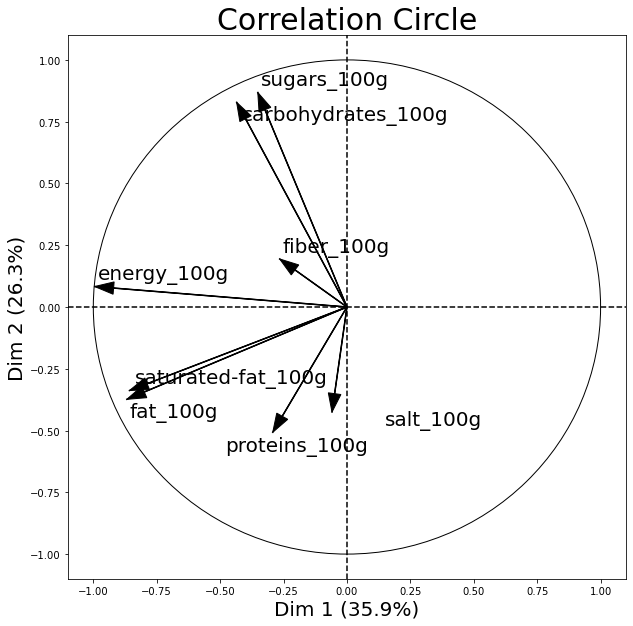

In [63]:
fig, correlation_matrix = plot_pca_correlation_graph(
    data_recovered,
    #pcs,
    __100g,
    dimensions=(1,2),
    figure_axis_size=10
)

### Synthèse: 

PC1 explique 35.9% de la variance du jeu de données.

PC2 explique 26.3% de la variance du jeu de données. 

Il y a une forte corrélation postive entre le sucre et les carbohydrates, et entre le gras et les gras-saturés. 

Il y a une corrélation entre l'énergie, le gras et les gras-saturés.


Sur le graphique 3D on remarque que les point sont bien regrouper selon le nutri-grade. 